In [1]:
import pandas as pd  # 데이터프레임 조작을 위한 pandas 불러옴
import numpy as np  # 수치 계산을 위한 numpy 불러옴
from sklearn.model_selection import train_test_split  # 데이터 분할을 위한 train_test_split 불러옴
from sklearn.preprocessing import StandardScaler  # 스케일링을 위한 StandardScaler 불러옴

df = pd.read_csv('/Users/jinwoong/Desktop/coding/diabetes.csv')  # 당뇨병 데이터셋을 CSV에서 불러옴

In [2]:
df.info()  # 데이터프레임 df의 전체 정보(행 수, 결측치, 데이터 타입 등)를 출력함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### >> 모두 수치형 데이터이며 결측치가 없음

In [3]:
df.describe()  # 수치형 컬럼들의 기초 통계량(평균, 표준편차, 사분위수 등)을 출력함

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
X = df.drop('Outcome', axis=1)  # 'Outcome' 컬럼을 제외한 나머지 컬럼들을 입력 피처로 설정함  
y = df['Outcome']              # 'Outcome' 컬럼을 타겟 변수로 설정함

# EDA

>#### **데이터 분포 확인** 

***일반피쳐***

In [5]:
for col in X.columns:
    print(X[col].value_counts(), '\n')  # 각 컬럼별로 고유값의 빈도수를 출력함 (빈도수 분포 확인용)

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64 

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64 

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64 

SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39   

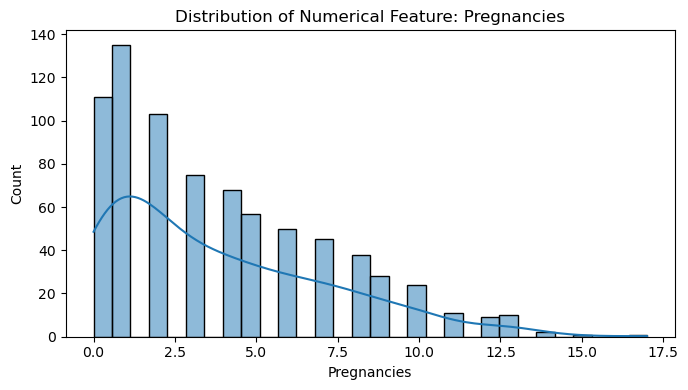

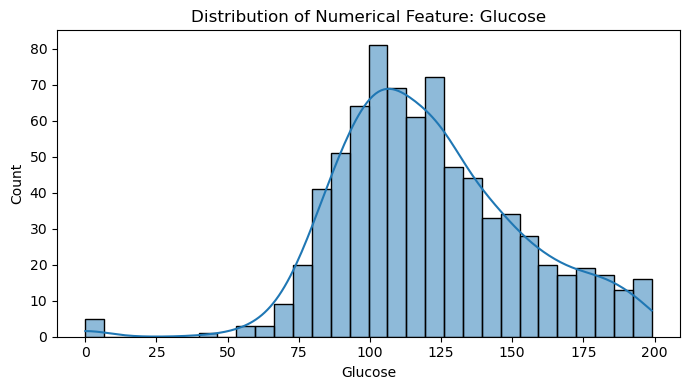

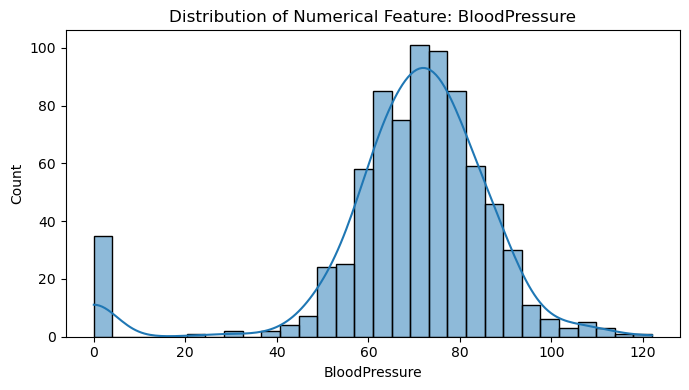

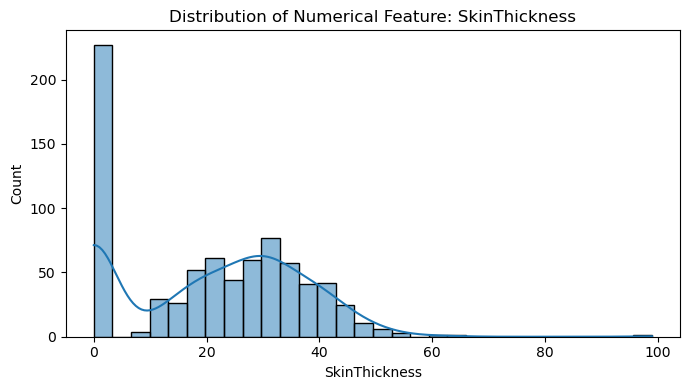

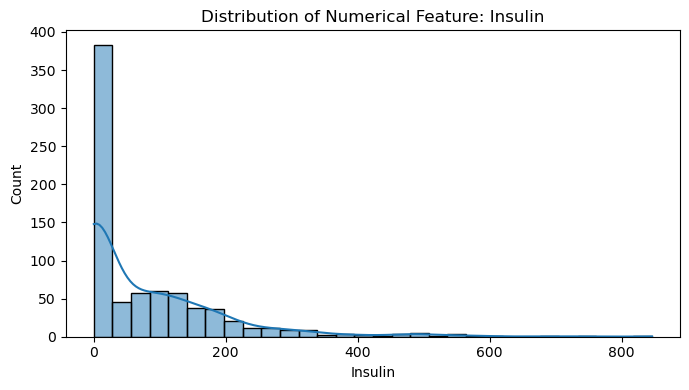

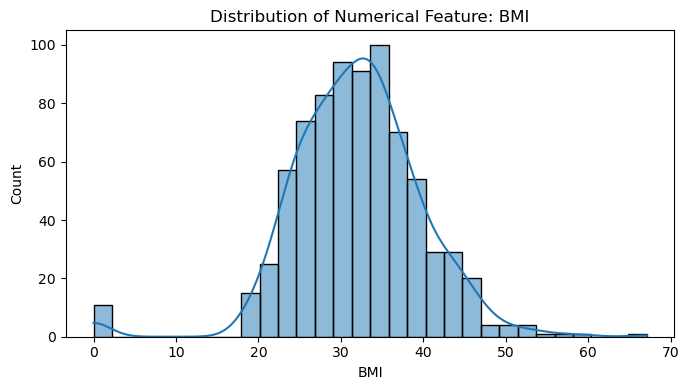

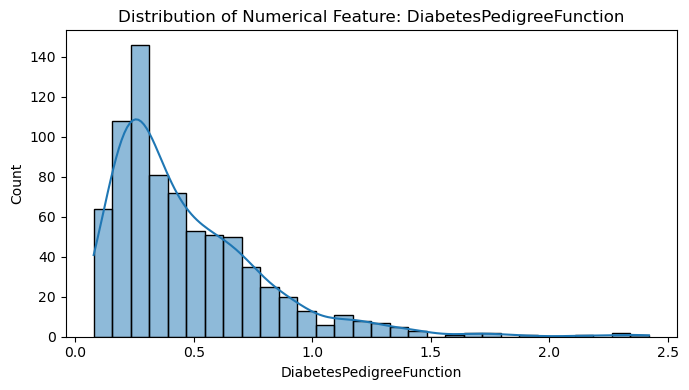

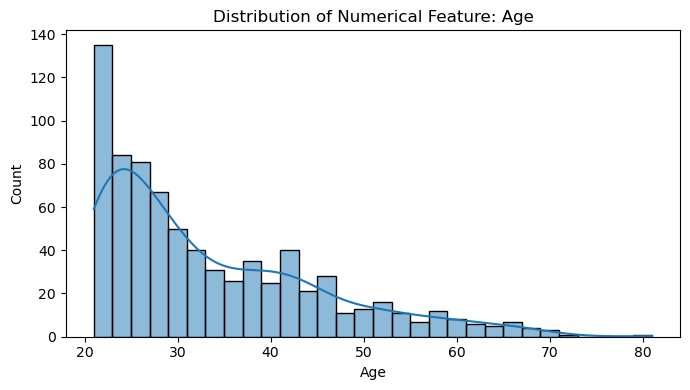

In [6]:
import matplotlib.pyplot as plt  # 시각화를 위한 matplotlib 라이브러리를 불러옴
import seaborn as sns            # 시각화를 위한 seaborn 라이브러리를 불러옴

# 수치형 컬럼 분포 시각화
for col in X.columns:  # 각 컬럼에 대해 반복 수행함
    plt.figure(figsize=(7, 4))  # 그래프 크기를 설정함
    sns.histplot(X[col].dropna(), kde=True, bins=30)  # 히스토그램 + 커널 밀도 추정 곡선을 그림
    plt.title(f'Distribution of Numerical Feature: {col}')  # 그래프 제목 설정
    plt.xlabel(col)  # x축 라벨 설정
    plt.ylabel('Count')  # y축 라벨 설정
    plt.tight_layout()  # 레이아웃 자동 정리
    plt.show()  # 그래프 출력

 
 본 프로젝트는 **신경망 기반 모델**을 사용하기 때문에  
 데이터를 **정규분포로 변환할 필요가 없으며**,  
 **Min-Max Scaling**만으로도 학습에 적합한 입력 형식을 충분히 확보할 수 있다.

***타겟피쳐***

In [7]:
y.value_counts()  # 타겟 변수 y에 대해 각 클래스(0 또는 1)의 샘플 개수를 출력함

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='Count'>

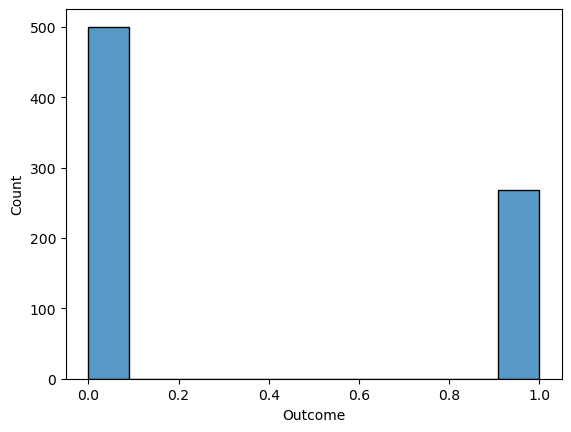

In [8]:
import seaborn as sns  # seaborn 시각화 라이브러리를 불러옴

sns.histplot(y)  # 타겟 변수 y의 클래스 분포를 히스토그램 형태로 시각화함

클래스 데이터 불균형이 있지만 심해 보이지는 않음.



>#### **상관계수분석** 

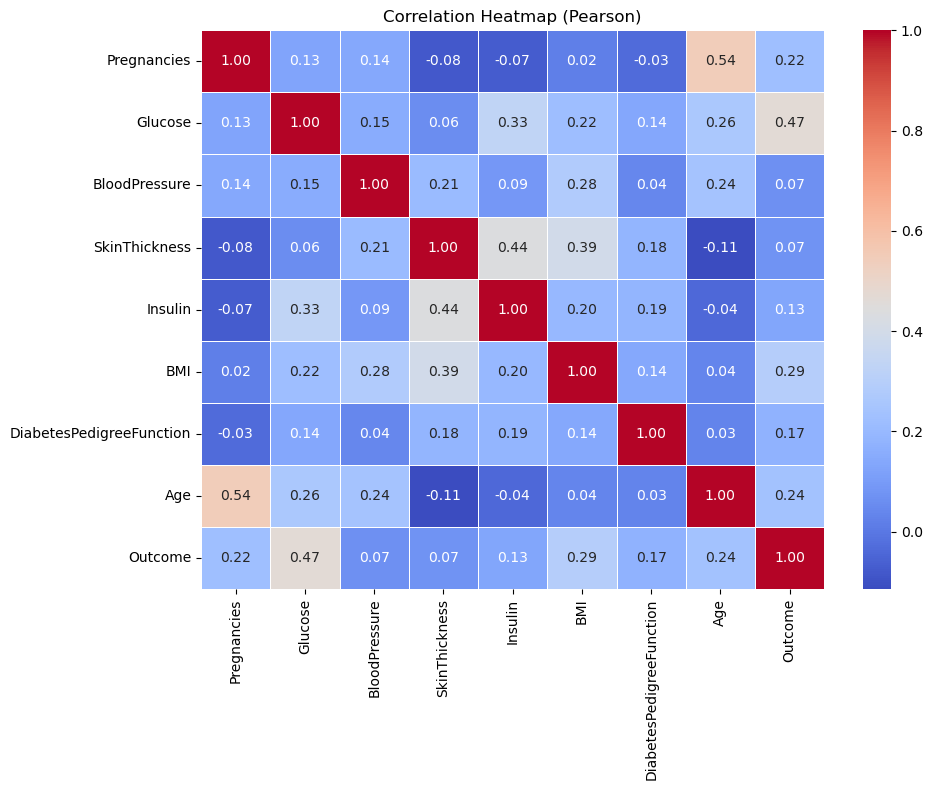

In [9]:
# 1. 수치형 피처만 선택함
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 2. 선택된 수치형 피처들 간의 피어슨 상관계수 행렬을 계산함
corr_matrix = df[numeric_cols].corr(method='pearson')

# 3. 상관계수 행렬을 히트맵으로 시각화함
plt.figure(figsize=(10, 8))  # 그래프 크기 설정함
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  # 히트맵 그리기
plt.title('Correlation Heatmap (Pearson)')  # 제목 설정
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()  # 그래프 출력

- 상관계수가 **0.07로 낮은 두 피처를 제거**한 후 성능 비교 실험을 진행함

- 일반 피처 간에는 유사도가 높은 경우가 없어 보이며, **다중공선성의 위험은 없는 것으로 판단됨**

>#### **이상치확인**

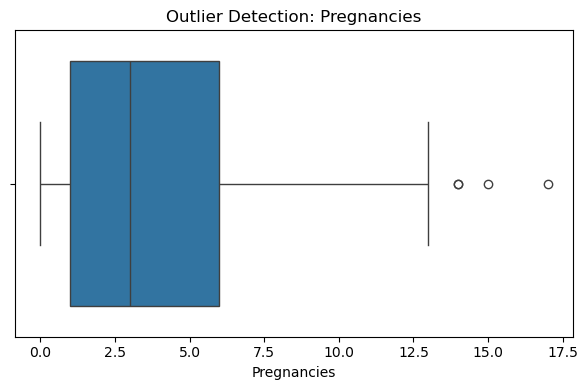

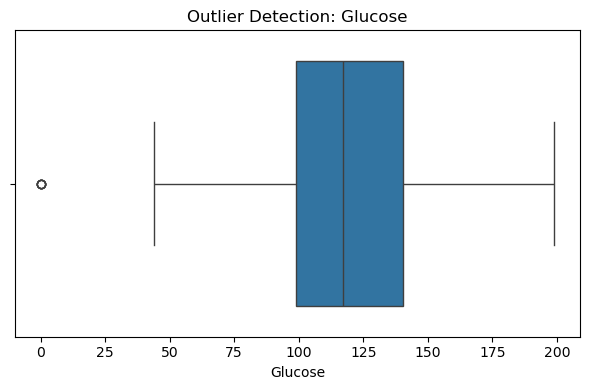

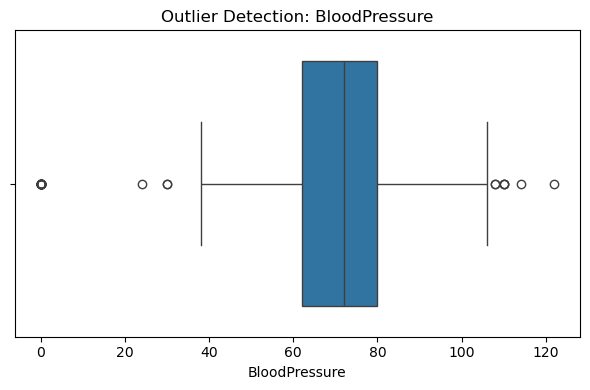

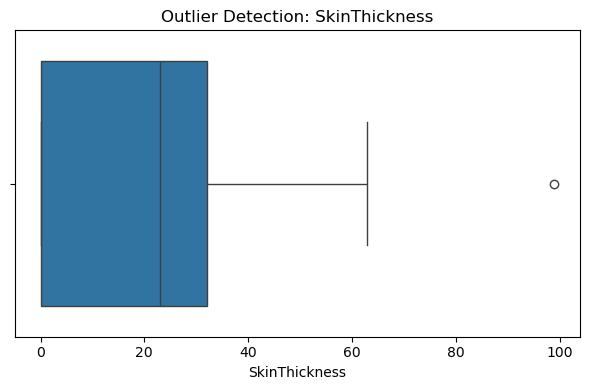

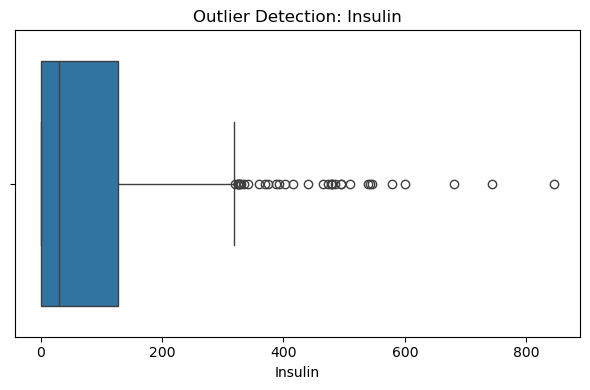

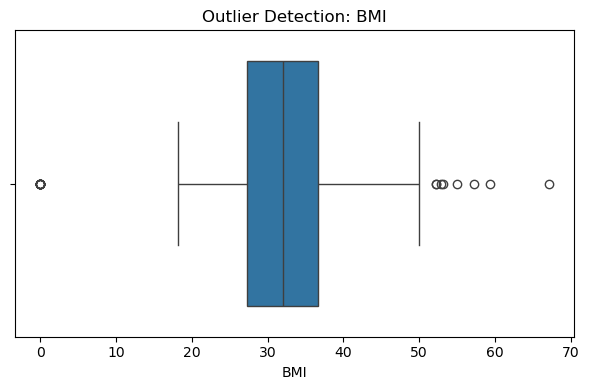

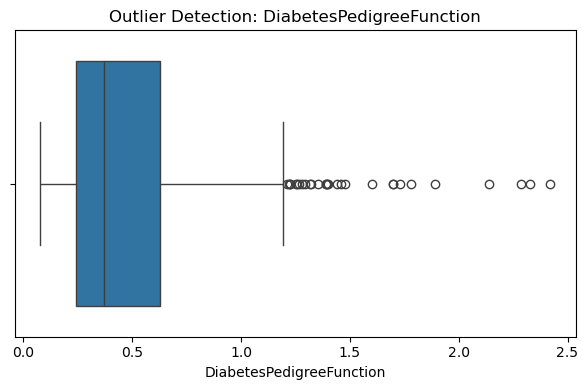

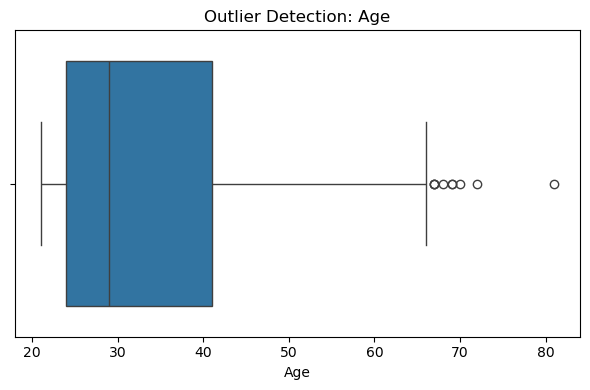

In [10]:
# 각 수치형 컬럼에 대해 박스플롯으로 이상치 시각화 수행함
for col in X.columns:
    plt.figure(figsize=(6, 4))                 # 그래프 크기 설정함
    sns.boxplot(x=X[col])                      # 해당 컬럼에 대한 박스플롯 그림
    plt.title(f'Outlier Detection: {col}')     # 그래프 제목 설정함
    plt.xlabel(col)                            # x축 라벨 설정함
    plt.tight_layout()                         # 레이아웃 자동 정렬
    plt.show()                                 # 그래프 출력

In [11]:
# 각 수치형 피처에 대해 이상치 개수 계산함
for col in X.columns:
    q1 = X[col].quantile(0.25)                              # 제1사분위수 계산함
    q3 = X[col].quantile(0.75)                              # 제3사분위수 계산함
    iqr = q3 - q1                                           # IQR(사분위 범위) 계산함
    lower_bound = q1 - 1.5 * iqr                            # 이상치 하한값 정의함
    upper_bound = q3 + 1.5 * iqr                            # 이상치 상한값 정의함
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]  # 이상치 데이터 추출함
    
    print(f"{col}: 이상치 개수 = {len(outliers)}")          # 이상치 개수 출력함

Pregnancies: 이상치 개수 = 4
Glucose: 이상치 개수 = 5
BloodPressure: 이상치 개수 = 45
SkinThickness: 이상치 개수 = 1
Insulin: 이상치 개수 = 34
BMI: 이상치 개수 = 19
DiabetesPedigreeFunction: 이상치 개수 = 29
Age: 이상치 개수 = 9


In [12]:
scaler = StandardScaler()                                # 표준화(평균 0, 표준편차 1)를 위한 스케일러 객체 생성함
X_scaled = scaler.fit_transform(X)                       # 전체 피처에 대해 스케일링 적용함 (ndarray 형태 반환)
X_scaled_only = pd.DataFrame(X_scaled, columns=X.columns)  # ndarray를 DataFrame으로 변환하고 컬럼명 유지함

In [13]:
# 복사본 생성
X_no_outliers = X.copy()                                       # 이상치 제거용으로 X의 복사본 생성함

# 이상치가 있는 행의 인덱스를 모으기 위한 집합
outlier_indices = set()                                        # 이상치 인덱스를 저장할 집합 초기화함

for col in X.columns:
    q1 = X[col].quantile(0.25)                                 # 1사분위수 계산함
    q3 = X[col].quantile(0.75)                                 # 3사분위수 계산함
    iqr = q3 - q1                                              # IQR 계산함
    lower_bound = q1 - 1.5 * iqr                               # 이상치 하한 경계 계산함
    upper_bound = q3 + 1.5 * iqr                               # 이상치 상한 경계 계산함

    # 이상치 인덱스 수집
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)].index  # 해당 컬럼의 이상치 인덱스 찾음
    outlier_indices.update(outliers)                         # 이상치 인덱스를 집합에 추가함

# 이상치 제거
X_no_outliers = X_scaled_only.drop(index=outlier_indices)     # 스케일링된 X에서 이상치 인덱스를 제거함
y_no_outliers = y.drop(index=outlier_indices)                 # y에서도 동일 인덱스를 제거함

In [14]:
#4개 버전의 데이터셋 생성

#1.X_scaled_only(스케일링만 적용 -> base 모델)
#2.X_no_outlier(이상치 제거만 적용)
X_feature_drop = X_scaled_only.drop(['BloodPressure','SkinThickness'],axis = 1)#3피쳐드롭만 적용 
X_both = X_no_outliers.drop(['BloodPressure','SkinThickness'],axis = 1)#4피쳐드롭과 이상치제거 둘다 적용



In [15]:
# X: 입력 피처, y: 타겟 변수라고 가정
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled_only, y, test_size=0.2, random_state=42) #스케일링만 적용한 데이터셋 훈련,테스트로 분리
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42) #스케일링 + 이상치제거 적용한 데이터셋 훈련,테스트로 분리
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feature_drop, y, test_size=0.2, random_state=42) #스케일링 + 피쳐드롭 적용한 데이터셋 훈련,테스트로 분리
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_both, y_no_outliers, test_size=0.2, random_state=42) #스케일링 + 이상치제거 + 피쳐드롭 적용한 데이터셋 훈련,테스트로 분리

Epoch 1/100


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5006 - loss: 0.6955 - val_accuracy: 0.6623 - val_loss: 0.6518
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6572 - loss: 0.6375 - val_accuracy: 0.7143 - val_loss: 0.6144
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7565 - loss: 0.5738 - val_accuracy: 0.6948 - val_loss: 0.5882
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7875 - loss: 0.5357 - val_accuracy: 0.7143 - val_loss: 0.5627
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7516 - loss: 0.5317 - val_accuracy: 0.7273 - val_loss: 0.5426
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7658 - loss: 0.4996 - val_accuracy: 0.7403 - val_loss: 0.5285
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7803 - loss: 0.4950 - val_accuracy: 0.7597 - val_loss: 0.5132
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7718 - loss: 0.4846 - val_accuracy: 0.7532 - val_loss: 0.

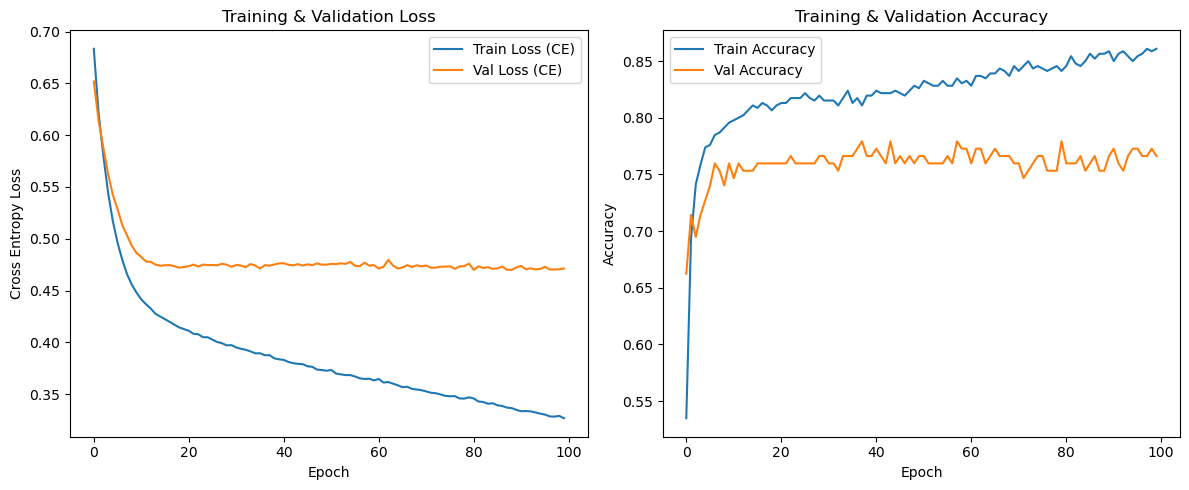

In [16]:
import matplotlib.pyplot as plt                                  # 시각화를 위한 matplotlib 불러옴
from tensorflow.keras.models import Sequential                   # 순차적 신경망 모델 클래스 불러옴
from tensorflow.keras.layers import Dense                        # 밀집 레이어(Dense layer) 불러옴
from tensorflow.keras.losses import BinaryCrossentropy           # 이진 분류용 손실 함수 불러옴
from tensorflow.keras.optimizers import Adam                     # Adam 옵티마이저 불러옴

# 1. 신경망 모델 정의
model = Sequential([                                              # 순차적 모델 생성 시작함
    Dense(32, activation='relu', input_shape=(X_train_s.shape[1],)),  # 첫 은닉층: 32개 노드, ReLU, 입력 차원 지정
    Dense(16, activation='relu'),                                  # 두 번째 은닉층: 16개 노드, ReLU
    Dense(1, activation='sigmoid')                                 # 출력층: 노드 1개, 시그모이드 함수로 확률 출력
])

# 2. 모델 컴파일 (손실함수: CE, 평가 지표: Accuracy)
model.compile(
    optimizer=Adam(learning_rate=0.001),                           # 옵티마이저는 Adam, 학습률 0.001로 설정함
    loss=BinaryCrossentropy(),                                    # 손실 함수는 이진 크로스 엔트로피 사용함
    metrics=['accuracy']                                          # 평가 지표로 정확도 사용함
)

# 3. 학습 (학습 데이터의 25%를 검증용으로 자동 분할)
history = model.fit(
    X_train_s, y_train_s,                                         # 학습 데이터와 타겟 데이터 입력
    epochs=100,                                                   # 총 학습 반복 횟수는 100 에폭임
    validation_split=0.25,                                        # 학습 데이터 중 25%를 검증 데이터로 사용함
    verbose=1                                                     # 학습 진행 로그 출력함
)

# 4. 성능 시각화
plt.figure(figsize=(12, 5))                                       # 시각화 크기 설정

# Loss
plt.subplot(1, 2, 1)                                              # 1행 2열 중 첫 번째 subplot
plt.plot(history.history['loss'], label='Train Loss (CE)')       # 훈련 손실 그래프
plt.plot(history.history['val_loss'], label='Val Loss (CE)')     # 검증 손실 그래프
plt.xlabel('Epoch')                                              # x축 라벨 설정
plt.ylabel('Cross Entropy Loss')                                 # y축 라벨 설정
plt.title('Training & Validation Loss')                          # 그래프 제목
plt.legend()                                                     # 범례 표시

# Accuracy
plt.subplot(1, 2, 2)                                              # 1행 2열 중 두 번째 subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')    # 훈련 정확도 그래프
plt.plot(history.history['val_accuracy'], label='Val Accuracy')  # 검증 정확도 그래프
plt.xlabel('Epoch')                                              # x축 라벨 설정
plt.ylabel('Accuracy')                                           # y축 라벨 설정
plt.title('Training & Validation Accuracy')                      # 그래프 제목
plt.legend()                                                     # 범례 표시

plt.tight_layout()                                               # subplot 간격 자동 조정
plt.show()                                                       # 그래프 출력

# Epoch 수 최적화 리포트

## 시각화 기반 성능 분석

- **Training Loss (CE)**: 에폭이 진행됨에 따라 지속적으로 감소함
- **Validation Loss (CE)**: 약 **20 epoch** 이후부터 정체됨
- **Training Accuracy**: 꾸준히 상승
- **Validation Accuracy**: 약 **20~30 epoch** 부근에서 정체됨 또는 미세한 상승 -> 일반화 성능 개선 거의 없음

## 결론

- **적절한 Epoch 수**: 약 **20 ~ 30 에폭 사이**
- **Validation 성능 정체 또는 하락** -> 일반화 성능 저하 우려
- 계산 자원 낭비를 막기 위해 조기 종료 전략 적용 권장


Epoch 1/25


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4939 - loss: 0.7220 - val_accuracy: 0.7013 - val_loss: 0.6311
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6672 - loss: 0.6292 - val_accuracy: 0.7273 - val_loss: 0.5964
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7213 - loss: 0.5757 - val_accuracy: 0.7143 - val_loss: 0.5726
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7208 - loss: 0.5557 - val_accuracy: 0.7013 - val_loss: 0.5518
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7563 - loss: 0.5193 - val_accuracy: 0.7208 - val_loss: 0.5324
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7579 - loss: 0.4992 - val_accuracy: 0.7338 - val_loss: 0.5167
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7722 - loss: 0.4899 - val_accuracy: 0.7338 - val_loss: 0.5030
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7936 - loss: 0.4738 - val_accuracy: 0.7273 - val_loss: 0.4933
Epo

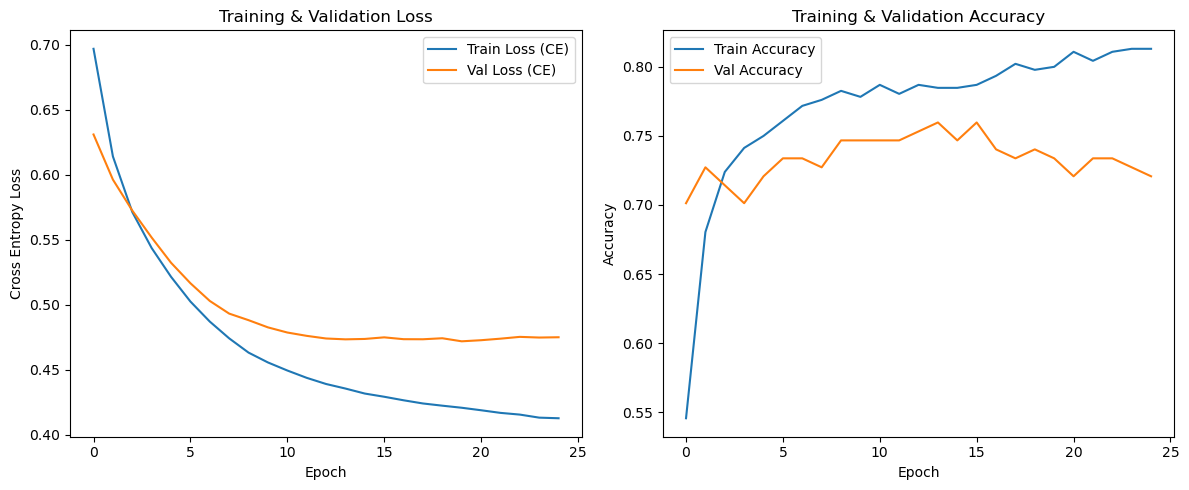

In [17]:
# epoch수 25로 지정 후 모델 재생성 및 학습

# 신경망 모델 정의
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_s.shape[1],)),  # 첫 은닉층: 32개 노드, ReLU 활성화 함수 사용
    Dense(16, activation='relu'),                                     # 두 번째 은닉층: 16개 노드, ReLU 사용
    Dense(1, activation='sigmoid')                                    # 출력층: 이진 분류용 sigmoid 활성화 함수 사용
])

# 모델 컴파일 (손실함수: Cross Entropy, 평가 지표: Accuracy)
model.compile(
    optimizer=Adam(learning_rate=0.001),      # Adam 옵티마이저 사용, 학습률은 0.001로 설정함
    loss=BinaryCrossentropy(),                # 이진 분류에 적합한 크로스 엔트로피 손실 함수 사용
    metrics=['accuracy']                      # 정확도를 평가 지표로 설정함
)

# 모델 학습 수행 (전체 학습 데이터 중 25%를 검증용으로 분리)
history = model.fit(
    X_train_s, y_train_s,                     # 학습 입력값과 정답 레이블 입력
    epochs=25,                                # 학습 반복 횟수를 25로 설정함
    validation_split=0.25,                    # 학습 데이터의 25%를 검증용 데이터로 사용함
    verbose=1                                 # 학습 과정 출력 설정
)

# 학습 결과 시각화
plt.figure(figsize=(12, 5))                   # 그래프 크기 설정

# 손실 함수 시각화
plt.subplot(1, 2, 1)                          # 첫 번째 subplot
plt.plot(history.history['loss'], label='Train Loss (CE)')        # 훈련 손실 시각화
plt.plot(history.history['val_loss'], label='Val Loss (CE)')      # 검증 손실 시각화
plt.xlabel('Epoch')                           # x축 라벨 설정
plt.ylabel('Cross Entropy Loss')              # y축 라벨 설정
plt.title('Training & Validation Loss')       # 그래프 제목 설정
plt.legend()                                  # 범례 표시

# 정확도 시각화
plt.subplot(1, 2, 2)                          # 두 번째 subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')     # 훈련 정확도 시각화
plt.plot(history.history['val_accuracy'], label='Val Accuracy')   # 검증 정확도 시각화
plt.xlabel('Epoch')                           # x축 라벨 설정
plt.ylabel('Accuracy')                        # y축 라벨 설정
plt.title('Training & Validation Accuracy')   # 그래프 제목 설정
plt.legend()                                  # 범례 표시

plt.tight_layout()                            # 그래프 간격 자동 조정
plt.show()                                    # 그래프 출력

In [18]:
# 테스트 데이터셋에 대한 예측 및 성능 평가
test_loss, test_accuracy = model.evaluate(X_test_s, y_test_s, verbose=0)  # 테스트셋에서 손실과 정확도 평가함

# 평가 결과 출력
print(f"Test Loss (Cross Entropy): {test_loss:.4f}")       # 테스트 손실값 출력 (소수점 4자리까지)
print(f"Test Accuracy: {test_accuracy:.4f}")               # 테스트 정확도 출력 (소수점 4자리까지)

Test Loss (Cross Entropy): 0.5557
Test Accuracy: 0.7403


In [19]:
from sklearn.metrics import classification_report

# 예측 수행: 확률 값을 0.5 기준으로 이진 분류함
y_pred = (model.predict(X_test_s) > 0.5).astype(int).flatten()  # 0.5보다 크면 1, 작으면 0으로 변환함

# 실제 정답값 벡터로 변환
y_true = y_test_s.values.flatten()  # 시리즈를 1차원 배열로 변환함

# 분류 성능 리포트 출력
print(classification_report(y_true, y_pred))  # Precision, Recall, F1-score 등 출력함

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



#  모델 성능 평가 리포트

##  분석 및 해석

- 모델은 전체적으로 75%의 정확도를 기록함.
- 클래스 0 (Negative class)에 대해서는 Precision, Recall, F1 모두 0.80로 양호한 성능을 보임.
- 반면, 클래스 1 (Positive class)에 대해서는 Precision 및 Recall이 각각 0.64, 0.64로 상대적으로 낮음.

##  결론 및 향후 방향

- 현재 모델은 클래스 1 예측 성능이 다소 부족함.
- 다음과 같은 방법들을 적용하여 개선 여지가 있음:
  - SMOTE 등 불균형 데이터 보완 기법
  - 모델 구조 변경 (은닉층 수, 뉴런 수, 활성화 함수 등)
  - 하이퍼파라미터 튜닝 (learning rate, batch size 등)
  - 또는 다른 분류 알고리즘과의 비교도 고려

 현재 모델은 base 모델로는 나쁘지 않으며, 추가적인 실험을 통해 성능을 높일 수 있는 여지가 충분함

In [20]:
# 모델구조, 옵티마이저, 하이퍼파라미터, 데이터셋 등을 바꿔가며
# 모델 학습 및 성능 시각화, 평가할 함수 정의함

from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def build_train_report_nn(
    X_train, y_train,             # 학습 데이터셋
    X_test, y_test,               # 테스트 데이터셋
    hidden_layers=[32, 16],       # 은닉층 노드 구성
    activation='relu',            # 은닉층 활성화 함수
    optimizer='adam',             # 옵티마이저 이름
    learning_rate=0.001,          # 학습률
    batch_size=32,                # 배치 사이즈
    epochs=100,                   # 학습 반복 횟수
    validation_split=0.25,        # 검증 데이터 비율
    verbose=1                     # 출력 여부
):
    # 옵티마이저 딕셔너리 정의함
    optimizers = {
        'adam': Adam(learning_rate=learning_rate),         # Adam 옵티마이저 객체
        'sgd': SGD(learning_rate=learning_rate),           # SGD 옵티마이저 객체
        'rmsprop': RMSprop(learning_rate=learning_rate)    # RMSprop 옵티마이저 객체
    }

    # 신경망 모델 정의 시작
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(X_train.shape[1],)))  # 첫 은닉층

    # 나머지 은닉층 반복 추가
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))  # 추가 은닉층

    model.add(Dense(1, activation='sigmoid'))  # 출력층 (이진 분류용 sigmoid)

    # 모델 컴파일 설정
    model.compile(
        optimizer=optimizers.get(optimizer, Adam(learning_rate=learning_rate)),  # 지정한 옵티마이저
        loss=BinaryCrossentropy(),  # 손실함수: 교차 엔트로피
        metrics=['accuracy']        # 평가 지표: 정확도
    )

    # 모델 학습 수행
    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,             # 배치 사이즈 설정
        epochs=epochs,                     # 에폭 수 설정
        validation_split=validation_split, # 검증 데이터 분리 비율
        verbose=verbose                    # 학습 중 출력 여부
    )

    # 테스트 데이터셋에 대해 예측 수행
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()  # 확률 → 이진 클래스

    # 테스트 데이터 성능 평가 리포트 출력
    print("\nClassification Report (on Test Set):\n")
    print(classification_report(y_test, y_pred))  # precision, recall, f1-score 등 출력

    # 성능 시각화
    plt.figure(figsize=(12, 5))

    # 손실 그래프
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.title('Loss per Epoch')
    plt.legend()

    # 정확도 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model, history  # 훈련된 모델과 학습 이력 반환함

## 실험 계획: 전처리 방식에 따른 모델 성능 비교

데이터 전처리 방식에 따라 총 4가지 버전의 데이터셋을 생성하고, 이에 대해 모델 성능을 비교 평가하고자 함.

### 데이터셋 버전 구성

1. **Base 모델 (스케일링만 적용)**  
   - 데이터셋: X_scaled_only

2. **실험 1: 스케일링 + 이상치 제거**  
   - 데이터셋: X_no_outliers

3. **실험 2: 스케일링 + 피처드롭**  
   - 제거 피처: BloodPressure, SkinThickness  
   - 데이터셋: X_feature_drop = X_scaled_only.drop(...)

4. **실험 3: 스케일링 + 이상치 제거 + 피처드롭**  
   - 데이터셋: X_both = X_no_outliers.drop(...)

### 실험 목표

- 각 실험 데이터셋에 대해 동일한 모델로 학습 및 테스트 수행
- **Accuracy, Precision, Recall, F1-score** 등을 기준으로 성능 비교
- 피처드롭, 이상치 제거가 실제로 모델 성능 향상에 도움이 되는지 분석

Epoch 1/100


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4928 - loss: 0.7051 - val_accuracy: 0.6172 - val_loss: 0.6648
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6818 - loss: 0.6344 - val_accuracy: 0.6797 - val_loss: 0.6215
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7441 - loss: 0.5843 - val_accuracy: 0.7188 - val_loss: 0.5869
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7622 - loss: 0.5474 - val_accuracy: 0.7109 - val_loss: 0.5615
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7770 - loss: 0.5003 - val_accuracy: 0.7109 - val_loss: 0.5443
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7711 - loss: 0.4772 - val_accuracy: 0.7188 - val_loss: 0.5361
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss: 0.4644 - val_accuracy: 0.7188 - val_loss: 0.5326
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7844 - loss: 0.4472 - val_accuracy: 0.7344 - val_loss: 0.5

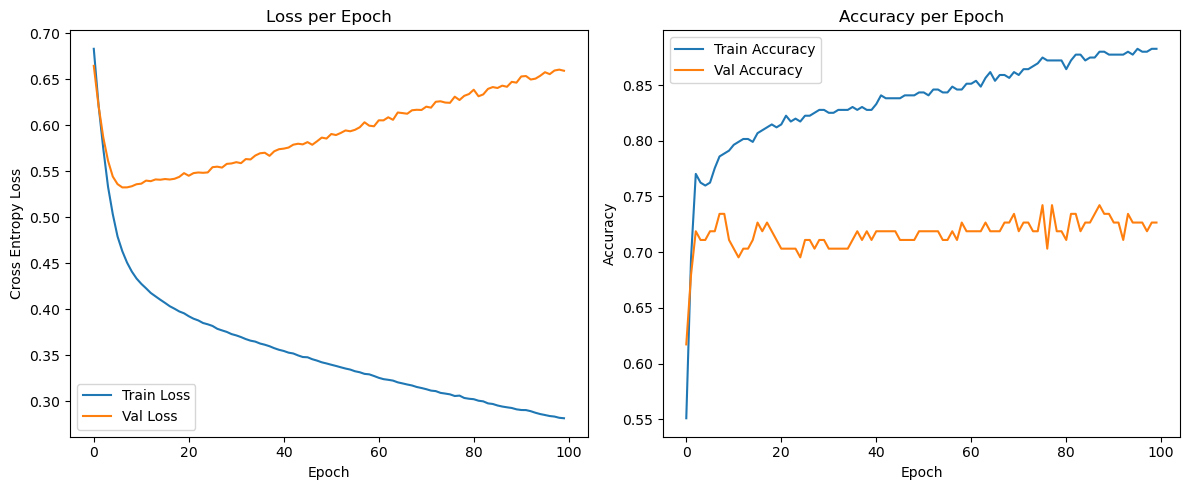

In [21]:
# 실험1 outlier 제거한 데이터셋 활용

model, history = build_train_report_nn(
    X_train=X_train_o,            # 이상치 제거된 학습 데이터 피처
    y_train=y_train_o,            # 이상치 제거된 학습 데이터 타겟
    X_test=X_test_o,              # 이상치 제거된 테스트 데이터 피처
    y_test=y_test_o,              # 이상치 제거된 테스트 데이터 타겟
    hidden_layers=[32, 16],       # 은닉층 2개: 32노드, 16노드 구성
    activation='relu',            # 은닉층 활성화 함수로 ReLU 사용
    optimizer='adam',             # Adam 옵티마이저 사용
    learning_rate=0.001,          # 학습률 0.001
    batch_size=32,                # 배치 사이즈 32
    epochs=100                    # 총 학습 반복 횟수 100
)

Epoch 1/100


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4275 - loss: 0.7351 - val_accuracy: 0.5909 - val_loss: 0.6748
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6709 - loss: 0.6508 - val_accuracy: 0.6688 - val_loss: 0.6277
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 0.6084 - val_accuracy: 0.6688 - val_loss: 0.5982
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.5731 - val_accuracy: 0.6883 - val_loss: 0.5743
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7396 - loss: 0.5373 - val_accuracy: 0.6883 - val_loss: 0.5563
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: 0.5358 - val_accuracy: 0.7403 - val_loss: 0.5398
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7395 - loss: 0.5175 - val_accuracy: 0.7532 - val_loss: 0.5257
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7545 - loss: 0.4911 - val_accuracy: 0.7662 - val_loss: 0.5

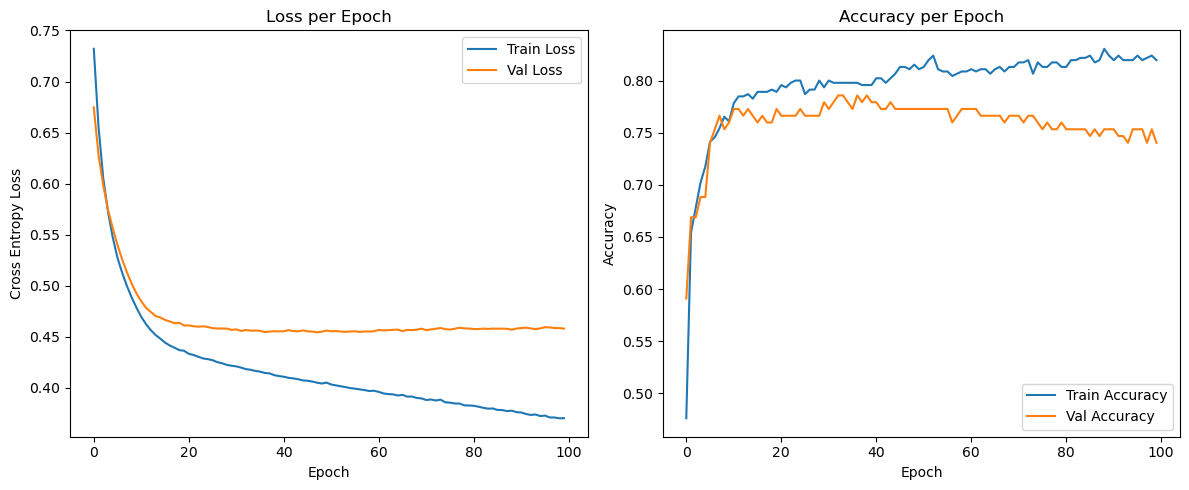

In [22]:
#실험2 피쳐드롭만 적용한 데이터셋 활용

model, history = build_train_report_nn(
    X_train=X_train_f,           # 피처 드롭만 적용된 학습 데이터 피처
    y_train=y_train_f,           # 피처 드롭만 적용된 학습 데이터 타겟
    X_test=X_test_f,             # 피처 드롭만 적용된 테스트 데이터 피처
    y_test=y_test_f,             # 피처 드롭만 적용된 테스트 데이터 타겟
    hidden_layers=[32, 16],      # 은닉층 구조: 32노드, 16노드
    activation='relu',           # 활성화 함수: ReLU
    optimizer='adam',            # 옵티마이저: Adam
    learning_rate=0.001,         # 학습률: 0.001
    batch_size=32,               # 배치 사이즈: 32
    epochs=100                   # 총 에폭 수: 100
)

Epoch 1/100


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5501 - loss: 0.7002 - val_accuracy: 0.6641 - val_loss: 0.6693
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6972 - loss: 0.6549 - val_accuracy: 0.7188 - val_loss: 0.6164
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7557 - loss: 0.6057 - val_accuracy: 0.7578 - val_loss: 0.5793
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7513 - loss: 0.5593 - val_accuracy: 0.7578 - val_loss: 0.5493
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7785 - loss: 0.5185 - val_accuracy: 0.7656 - val_loss: 0.5306
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7835 - loss: 0.4924 - val_accuracy: 0.7578 - val_loss: 0.5177
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8075 - loss: 0.4613 - val_accuracy: 0.7578 - val_loss: 0.5130
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.4540 - val_accuracy: 0.7656 - val_loss: 0.5

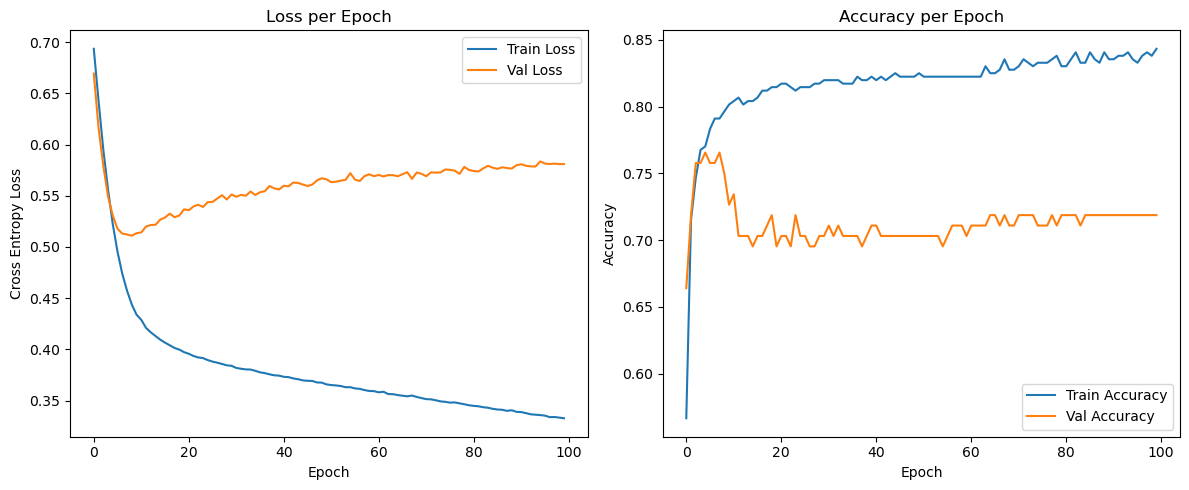

In [23]:
#실험 3피쳐드롭과 이상치제거 둘다 진행한 데이터셋 활용

model, history = build_train_report_nn(
    X_train=X_train_b,           # 이상치 제거 + 피처 드롭 적용된 학습 데이터 피처
    y_train=y_train_b,           # 이상치 제거 + 피처 드롭 적용된 학습 데이터 타겟
    X_test=X_test_b,             # 이상치 제거 + 피처 드롭 적용된 테스트 데이터 피처
    y_test=y_test_b,             # 이상치 제거 + 피처 드롭 적용된 테스트 데이터 타겟
    hidden_layers=[32, 16],      # 은닉층 구조: 32노드, 16노드
    activation='relu',           # 활성화 함수: ReLU
    optimizer='adam',            # 옵티마이저: Adam
    learning_rate=0.001,         # 학습률: 0.001
    batch_size=32,               # 배치 사이즈: 32
    epochs=100                   # 총 에폭 수: 100
)

# 전처리 방식에 따른 데이터셋별 모델 성능 분석

## 실험 목적
- EDA 기반 전처리 방법(피처 드롭, 이상치 제거)이 신경망 분류 모델의 성능에 미치는 영향을 비교함
- 성능 비교는 과적합이 일어나기 전 에폭 구간에서의 최고 성능(Validation Accuracy) 기준으로 판단함

### 이상치 제거만 적용한 모델
- Train Accuracy는 꾸준히 증가하지만 Val Accuracy는 일정 수준(약 70%)에서 정체
- Val Loss는 감소세가 금방 멈추고 이후 증가 -> 과적합 발생
- 이상치 제거의 효과는 명확하게 성능 향상으로 이어지지 않음
- 일부 중요한 샘플을 제거했을 가능성 있음

### 피처 드롭만 적용한 모델
- Validation Accuracy가 약 78% 수준까지 상승, 이전보다 개선된 양상
- Val Loss는 안정적이며 과적합 시점이 비교적 늦게 등장
- 타겟값과의 상관관계가 낮은 피처를 제거한 것이 모델의 일반화 성능 향상으로 이어짐
- 불필요한 피처로 인한 잡음 제거 -> 학습 효율성 증가

### 피처 드롭 + 이상치 제거 동시 적용
- Val Accuracy가 다시 하락, 피처 드롭 단독보다 성능 저하
- 이상치 제거가 다시 성능 저해 요소로 작용했을 가능성 높음
- 두 전처리 방법이 항상 시너지를 내는 건 아님

## 결론
- 피처 드롭만 적용한 데이터셋이 가장 우수한 성능을 보임
- 따라서, 향후 실험 및 모델링에는 피처 드롭만 적용한 데이터셋을 사용

---

# 피처 드롭만 적용한 데이터셋으로 학습시킨 모델 문제점 및 개선 방안

##  문제점
- 모델 **훈련 정확도는 높게 유지**되었으나, **검증 성능은 일정 시점 이후 하락**
- 이는 **과적합**이 발생한 것으로 판단되며, **일반화 성능 향상을 위한 조치**가 필요함

##  개선 방안 
- **모델 복잡도 감소**  
  -> 은닉층의 노드 수를 줄이거나 층 수를 감소시켜 복잡도를 낮춤
- **학습률(learning rate) 감소**  
  -> 파라미터 업데이트 폭을 줄여 과적합 완화 및 손실 진동 감소를 유도함

Epoch 1/100


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2495 - loss: 0.8396 - val_accuracy: 0.3312 - val_loss: 0.7907
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2800 - loss: 0.8102 - val_accuracy: 0.3506 - val_loss: 0.7705
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2939 - loss: 0.7791 - val_accuracy: 0.3247 - val_loss: 0.7531
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2973 - loss: 0.7600 - val_accuracy: 0.3377 - val_loss: 0.7377
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3236 - loss: 0.7431 - val_accuracy: 0.3701 - val_loss: 0.7239
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3554 - loss: 0.7279 - val_accuracy: 0.4026 - val_loss: 0.7121
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4339 - loss: 0.7098 - val_accuracy: 0.5000 - val_loss: 0.7022
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5569 - loss: 0.6902 - val_accuracy: 0.5390 - val_loss: 0.6

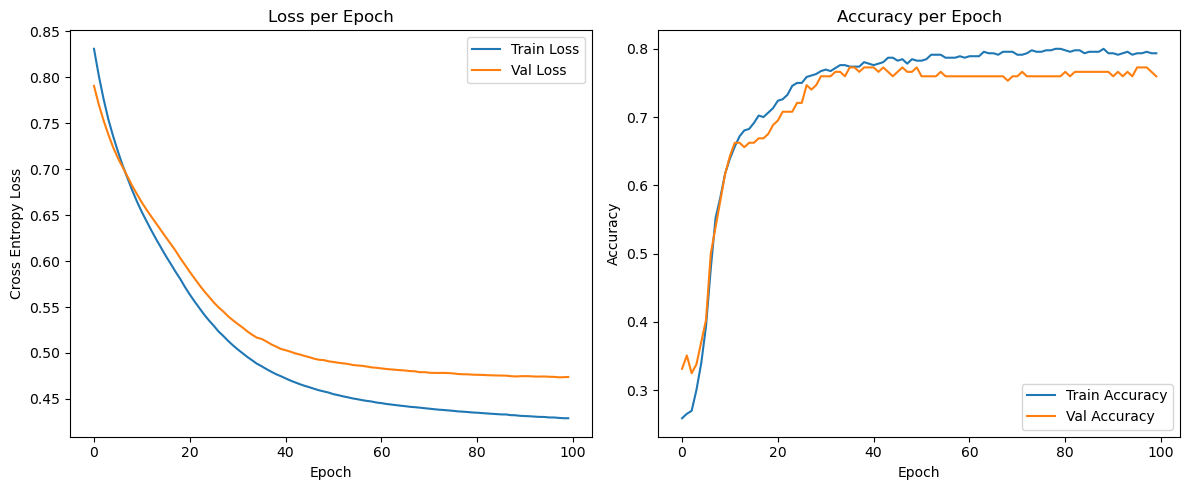

In [24]:
#성능 개선 실험 1

#모델 복잡도 감소 진행
#은닉층 노드수 [32,16] -> [16,8]

#학습률 조정 진행
#0.001 -> 0.0005
model, history = build_train_report_nn(
    X_train=X_train_f,           # 피처 드롭 적용된 학습 데이터 피처
    y_train=y_train_f,           # 피처 드롭 적용된 학습 데이터 타겟
    X_test=X_test_f,             # 피처 드롭 적용된 테스트 데이터 피처
    y_test=y_test_f,             # 피처 드롭 적용된 테스트 데이터 타겟
    hidden_layers=[16, 8],       # 은닉층 구조: 16노드, 8노드 → 기존보다 모델 복잡도 소폭 감소
    activation='relu',           # 활성화 함수: ReLU
    optimizer='adam',            # 옵티마이저: Adam
    learning_rate=0.0005,        # 학습률 감소 (기존 0.001 → 0.0005)
    batch_size=32,               # 배치 사이즈: 32
    epochs=100                   # 총 에폭 수: 100
)

### 성능 개선 실험 1 결과 분석: 은닉층 노드 수 감소 + 학습률 감소 (0.0005)

- Train Loss와 Val Loss 모두 안정적으로 감소함
- 과적합 없이 검증 정확도(Val Accuracy)가 꾸준히 상승
- 전체적으로 모델의 학습과 일반화 성능이 매우 안정적임

###  향후 개선 제안

- Dropout을 추가하여 향후 과적합 방지 기반 마련
- 은닉층 수 1개 추가하여 더 복잡한 패턴 학습 가능성 확인

> 현재 모델은 과적합 없이 안정적으로 학습 중이며, 추가 조정 없이도 우수한 성능을 보임.

---


### 성능 개선 실험 2

**배경**  
이전 실험에서는 은닉층의 노드 수를 줄여 모델의 복잡도를 낮춤으로써 과적합을 방지하고 전반적인 성능을 개선할 수 있었음. 그러나 여전히 **클래스 1에 대한 Recall 값이 낮게 나타나**, 소수 클래스에 대한 민감도가 부족한 상황임.

**가설**  
모델이 현재 너무 단순해져서 클래스 1에 대한 **복잡하거나 미묘한 패턴을 충분히 학습하지 못하고 있을 가능성**이 존재함. 이에 따라 은닉층의 **개수를 증가시켜** 표현력을 점진적으로 향상시키는 것이 소수 클래스 인식 향상(Recall 개선)에 기여할 수 있다고 판단함.

**실험 계획**  
기존 [16,8] -> [16, 8, 4] 또는 [16, 8, 4, 2]와 같이 은닉층을 **더 깊게 구성**한 모델로 실험을 수행하고, 그 결과를 기존 모델과 비교 분석함.

**기대 효과**  
- 클래스 1(소수 클래스)에 대한 **정확한 판별(Recall)** 향상
- **과적합 없이** 표현력 개선 가능성
- 성능 지표(Accuracy, F1-score 등)의 전반적인 개선

Epoch 1/100


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3574 - loss: 0.7380 - val_accuracy: 0.4221 - val_loss: 0.7087
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4710 - loss: 0.7159 - val_accuracy: 0.5260 - val_loss: 0.6918
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5246 - loss: 0.6999 - val_accuracy: 0.5649 - val_loss: 0.6779
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5815 - loss: 0.6804 - val_accuracy: 0.6039 - val_loss: 0.6679
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6293 - loss: 0.6613 - val_accuracy: 0.6104 - val_loss: 0.6585
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6607 - loss: 0.6531 - val_accuracy: 0.6429 - val_loss: 0.6498
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6558 - loss: 0.6436 - val_accuracy: 0.6299 - val_loss: 0.6418
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6896 - loss: 0.6393 - val_accuracy: 0.6234 - val_loss: 0.6

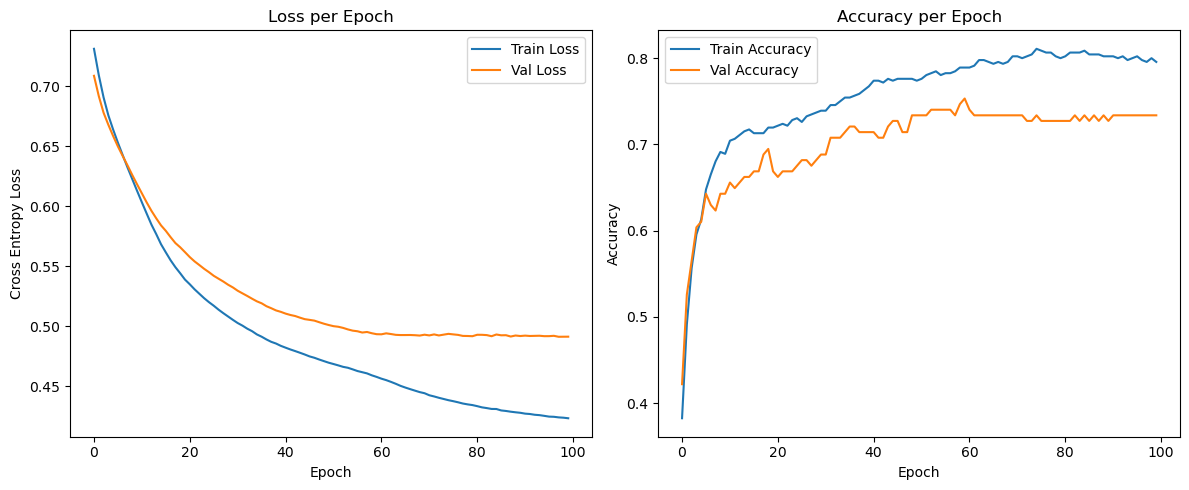

In [44]:
#성능 개선 실험 2

model, history = build_train_report_nn(
    X_train=X_train_f,           # 피처 드롭 적용된 학습 데이터 피처
    y_train=y_train_f,           # 피처 드롭 적용된 학습 데이터 타겟
    X_test=X_test_f,             # 피처 드롭 적용된 테스트 데이터 피처
    y_test=y_test_f,             # 피처 드롭 적용된 테스트 데이터 타겟
    hidden_layers=[16, 8, 4],    # 은닉층 3개 구성: 16 → 8 → 4 노드로 점차 축소되며 깊이 증가
    activation='relu',           # 활성화 함수: ReLU
    optimizer='adam',            # 옵티마이저: Adam
    learning_rate=0.0005,        # 학습률 감소 (0.001 → 0.0005)
    batch_size=32,               # 배치 사이즈: 32
    epochs=100                   # 총 학습 에폭 수: 100
)

###  성능 개선 실험 2 결과 분석

** 결과 요약**
- Class 1 - Recall: 기존 대비 **0.65 -> 0.67**로 소폭상승
- Class 1 - Precision: 0.68 -> 0.70 (소폭 상승)
- Class 1 - F1 Score: 0.67 -> 0.69 (소폭 상승)

** Loss 및 Accuracy 그래프 해석**
- Train/Validation Loss 모두 안정적으로 감소 → **과적합 없음**
- Validation Accuracy 진동 적고 **안정적인 수렴**

** 해석 및 결론**
- **은닉층 수 증가**는 클래스 1 Recall 향상에 일정 부분 기여한 것으로 판단됨
- 전체 Accuracy와 클래스 불균형 지표(F1-score, Recall 등)를 함께 고려하면 **이번 구조는 이전보다 안정적이고 개선된 모델**로 볼 수 있음

---

### 성능 개선 실험 3

### 배경

- 기존 모델에서 **Validation Accuracy의 진동**이 관측됨
- 일부 클래스의 **Recall 성능이 아직 충분히 개선되지 않음**
- 구조 변경보다는 학습 설정(optimizer, learning rate, batch size 등)의 미세한 튜닝이 더 효과적인 시점에 도달

### 가설

- **배치 사이즈 감소 (batch_size = 16)**
  - 더 다양한 gradient 방향을 반영하여 소수 클래스(특히 클래스 1)에 대한 민감도 향상
  - Recall 개선 가능성
  - 단, **val_loss / val_accuracy 진동 위험** 존재

- **배치 사이즈 증가 (batch_size = 64)**
  - gradient 평균화로 **모델 수렴 안정화**
  - **val_accuracy 곡선 부드러워짐**, 정확도 상승 가능성 있음

### 실험 계획

| 실험 번호 | 배치 사이즈 | 목적           | 기대되는 효과                                   |
|-----------|-------------|----------------|-------------------------------------------------|
| 실험 1    | 16          | Recall 향상    | 소수 클래스 민감도 증가 -> Recall 개선 기대      |
| 실험 2    | 64          | 안정성 향상    | 진동 완화 -> val_accuracy 안정화 및 정확도 상승 |

- 동일한 모델 구조, 학습률, 에폭 조건 하에서 실험 진행
- **Validation Accuracy**, **Recall**, **F1-score**, **Loss 그래프** 등을 종합적으로 비교 평가

### 기대 효과

- 성능 정체 구간에서 **추가적인 정밀도 및 민감도 향상 여지 확보**
- **과적합 또는 수렴 불안정 현상 완화**
- 모델 구조를 바꾸지 않고도 **단순 설정 튜닝으로 성능 개선 가능성 확인**

Epoch 1/100


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5480 - loss: 0.6889 - val_accuracy: 0.6234 - val_loss: 0.6742
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6379 - loss: 0.6681 - val_accuracy: 0.6688 - val_loss: 0.6623
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6596 - loss: 0.6536 - val_accuracy: 0.6753 - val_loss: 0.6506
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6881 - loss: 0.6369 - val_accuracy: 0.6688 - val_loss: 0.6367
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - loss: 0.6207 - val_accuracy: 0.6623 - val_loss: 0.6215
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6722 - loss: 0.6112 - val_accuracy: 0.6688 - val_loss: 0.6062
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - loss: 0.5918 - val_accuracy: 0.6623 - val_loss: 0.5906
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7202 - loss: 0.5536 - val_accuracy: 0.6623 - val_loss: 0.5

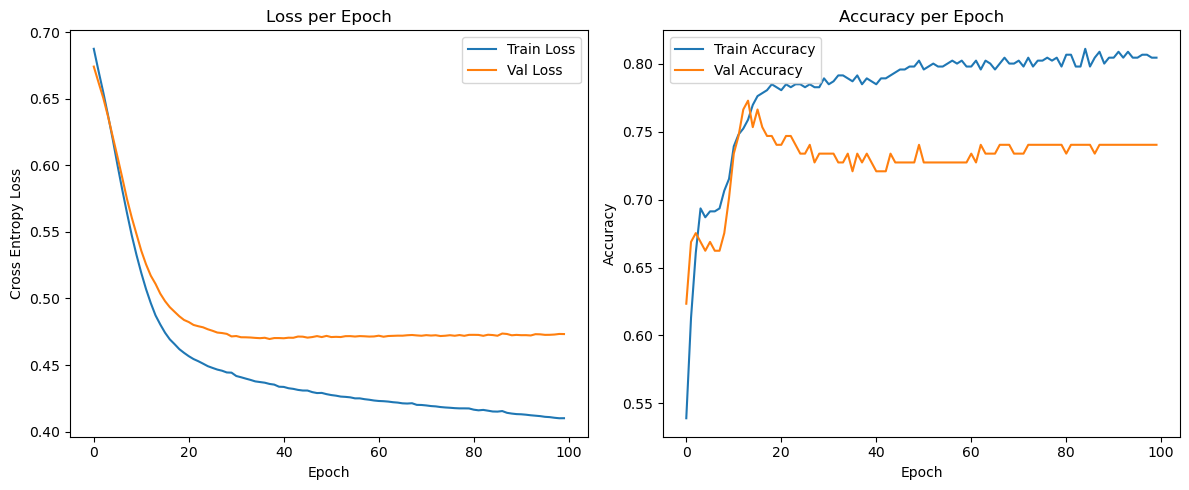

In [26]:
#성능 개선 실험 3-1(batch_size 감소)

model, history = build_train_report_nn(
    X_train=X_train_f,           # 피처 드롭 적용된 학습용 피처
    y_train=y_train_f,           # 피처 드롭 적용된 학습용 타겟
    X_test=X_test_f,             # 피처 드롭 적용된 테스트용 피처
    y_test=y_test_f,             # 피처 드롭 적용된 테스트용 타겟
    hidden_layers=[16, 8, 4],    # 은닉층 3개 구성: 깊이 증가 → 복잡한 패턴 학습 가능
    activation='relu',           # 활성화 함수: ReLU
    optimizer='adam',            # 옵티마이저: Adam
    learning_rate=0.0005,        # 학습률 감소 → 손실 진동 억제 및 안정적 수렴 유도
    batch_size=16,               # 배치 사이즈 감소 → 더 다양한 gradient 방향 탐색 → 소수 클래스 학습 유리
    epochs=100                   # 총 학습 에폭 수: 100
)

### 성능 개선 실험 3-1 결과 분석(배치 사이즈 축소 (32 -> 16))

### 분석

- **Validation Accuracy**는 전반적으로 소폭 하락하였으며, 클래스 1의 Recall과 F1-score가 뚜렷하게 감소
- 배치 사이즈를 줄였음에도 성능 향상 효과는 없었고, 오히려 성능 저하가 발생함.
- 이는 작은 배치 사이즈에서 발생하는 **gradient의 불안정성과 높은 분산**이 학습을 저해한 것으로 해석됨.
- 또한, 학습률은 그대로 유지되었기 때문에 학습이 불안정해졌을 가능성도 있음.

### 결론

- 배치 사이즈 축소는 이 실험에서 유의미한 개선을 이끌지 못했음.
- 특히 클래스 1에 대한 민감도를 높이기 위해 Recall을 개선하고자 했지만, **오히려 하락하는 결과**가 나왔음.
- 따라서 **기존의 안정적인 배치 사이즈를 유지**하는 것이 더 적절함.

Epoch 1/100


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3239 - loss: 0.7304 - val_accuracy: 0.3636 - val_loss: 0.7124
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3359 - loss: 0.7203 - val_accuracy: 0.3571 - val_loss: 0.7071
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3635 - loss: 0.7095 - val_accuracy: 0.3377 - val_loss: 0.7031
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3590 - loss: 0.7064 - val_accuracy: 0.3831 - val_loss: 0.6996
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3782 - loss: 0.7008 - val_accuracy: 0.4416 - val_loss: 0.6971
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4300 - loss: 0.6963 - val_accuracy: 0.4416 - val_loss: 0.6950
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4965 - loss: 0.6923 - val_accuracy: 0.4935 - val_loss: 0.6931
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5525 - loss: 0.6904 - val_accuracy: 0.5325 - val_loss: 0.6914
Epoch 9/100


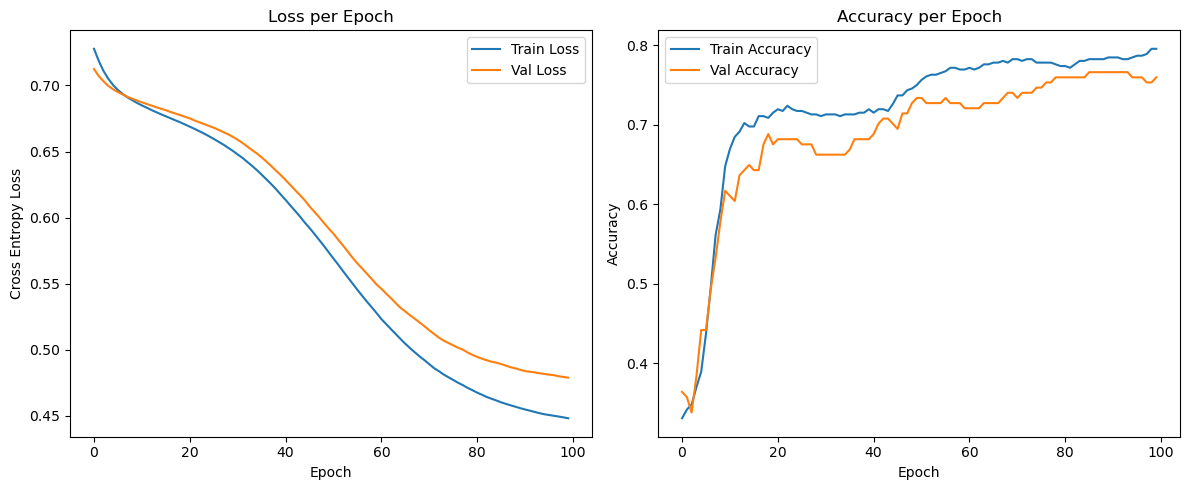

In [50]:
#성능 개선 실험 3-2(batch_size 증가)

model, history = build_train_report_nn(
    X_train=X_train_f,           # 피처 드롭 적용된 학습용 피처
    y_train=y_train_f,           # 피처 드롭 적용된 학습용 타겟
    X_test=X_test_f,             # 피처 드롭 적용된 테스트용 피처
    y_test=y_test_f,             # 피처 드롭 적용된 테스트용 타겟
    hidden_layers=[16, 8, 4],    # 은닉층 3개 구성: 복잡한 패턴 학습 가능
    activation='relu',           # 활성화 함수: ReLU
    optimizer='adam',            # 옵티마이저: Adam
    learning_rate=0.0005,        # 학습률 감소: 손실 진동 완화
    batch_size=64,               # 배치 사이즈 증가: 학습 안정화 및 일반화 성능 향상 기대
    epochs=100                   # 총 학습 에폭 수: 100
)

### 성능 개선 실험3-2(배치 사이즈 확대 (32 -> 64))

### 분석

- **Validation Accuracy 곡선은 상대적으로 안정적**이며 큰 진동 없이 완만하게 상승하는 경향을 보임.
- 그러나 클래스 1에 대한 **Recall 및 F1-score는 오히려 낮은 수치**를 기록하였고, 이는 모델이 class(1)를 **덜 민감하게** 예측하고 있다는 것을 시사함.
- Train-Validation 성능 간 간격은 존재하지만, **과적합 경향은 크지 않음**. 따라서 학습은 비교적 안정적이나 성능 개선 폭은 제한적임.
- 큰 배치 사이즈가 안정적인 수렴에는 기여했지만, **소수 클래스의 패턴을 충분히 학습하지 못한 결과**로 보임.

### 결론

- 배치 사이즈 확대는 모델 학습 안정성은 확보했지만, **성능(특히 클래스 1의 Recall)에 대한 실질적 향상은 없었음**.
- 따라서 현재 모델 구조에서는 **너무 큰 배치 사이즈가 모델의 민감도와 표현력에 제한을 줄 수 있음**.

---

## 옵티마이저 실험 (RMSprop, Momentum, SGD)

- 모든 모델 구조와 하이퍼파라미터는 고정(성능 개선 실험 2까지만 수행한 모델)한 상태에서,
- 옵티마이저만 각각 RMSprop, Momentum, SGD로 변경하여
- 모델의 성능 변화(Accuracy, Recall, F1-score 등)를 비교 분석함.

Epoch 1/100


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5955 - loss: 0.6738 - val_accuracy: 0.6299 - val_loss: 0.6659
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6477 - loss: 0.6609 - val_accuracy: 0.6234 - val_loss: 0.6572
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - loss: 0.6437 - val_accuracy: 0.6299 - val_loss: 0.6491
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - loss: 0.6355 - val_accuracy: 0.6234 - val_loss: 0.6407
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - loss: 0.6262 - val_accuracy: 0.6234 - val_loss: 0.6327
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6528 - loss: 0.6122 - val_accuracy: 0.6234 - val_loss: 0.6248
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6451 - loss: 0.6140 - val_accuracy: 0.6234 - val_loss: 0.6173
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6548 - loss: 0.5970 - val_accuracy: 0.6234 - val_loss: 0.6

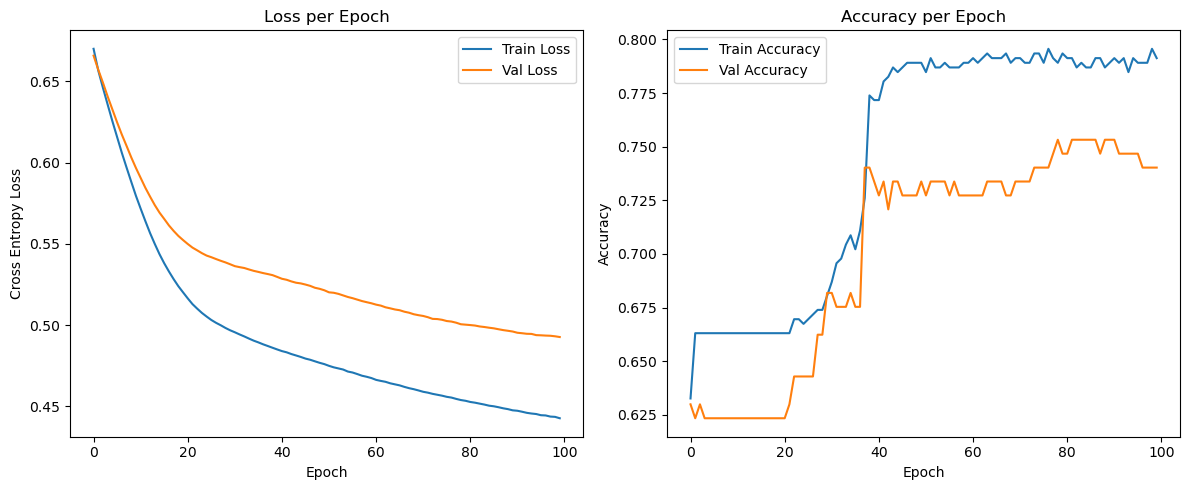

In [28]:
#rmsprop 적용

model, history = build_train_report_nn(
    X_train=X_train_f,           # 피처 드롭 적용된 학습용 피처
    y_train=y_train_f,           # 피처 드롭 적용된 학습용 타겟
    X_test=X_test_f,             # 피처 드롭 적용된 테스트용 피처
    y_test=y_test_f,             # 피처 드롭 적용된 테스트용 타겟
    hidden_layers=[16, 8, 4],    # 은닉층 3개 구성: 복잡한 패턴 학습 가능
    activation='relu',           # 활성화 함수: ReLU
    optimizer='rmsprop',         # 옵티마이저 변경: RMSprop 사용 (Adam과의 비교 실험)
    learning_rate=0.0005,        # 학습률 감소: 손실 진동 완화
    batch_size=32,               # 배치 사이즈 기본값 유지
    epochs=100                   # 총 학습 에폭 수: 100
)

Epoch 1/100


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3505 - loss: 0.7745 - val_accuracy: 0.4026 - val_loss: 0.7280
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3666 - loss: 0.7695 - val_accuracy: 0.4481 - val_loss: 0.7128
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4176 - loss: 0.7479 - val_accuracy: 0.5130 - val_loss: 0.7008
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4525 - loss: 0.7146 - val_accuracy: 0.5844 - val_loss: 0.6907
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5281 - loss: 0.7121 - val_accuracy: 0.6234 - val_loss: 0.6824
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6078 - loss: 0.6894 - val_accuracy: 0.6688 - val_loss: 0.6756
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6333 - loss: 0.6868 - val_accuracy: 0.6948 - val_loss: 0.6698
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6311 - loss: 0.6768 - val_accuracy: 0.7078 - val_loss: 0.6

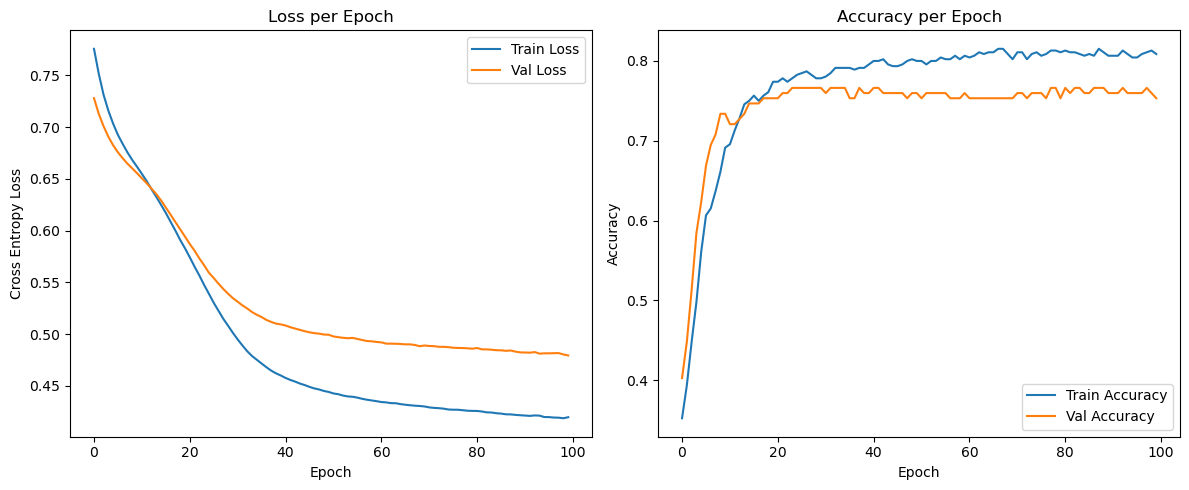

In [58]:
#momentum 적용

model, history = build_train_report_nn(
    X_train=X_train_f,           # 피처 드롭 적용된 학습용 피처
    y_train=y_train_f,           # 피처 드롭 적용된 학습용 타겟
    X_test=X_test_f,             # 피처 드롭 적용된 테스트용 피처
    y_test=y_test_f,             # 피처 드롭 적용된 테스트용 타겟
    hidden_layers=[16, 8, 4],    # 은닉층 3개 구성
    activation='relu',           # 활성화 함수: ReLU
    optimizer='momentum',        # 옵티마이저: Momentum
    learning_rate=0.0005,        # 학습률 감소
    batch_size=32,               # 배치 크기
    epochs=100                   # 학습 에폭 수
)

Epoch 1/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.7500 - loss: 0.6685

/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6673 - loss: 0.6850 - val_accuracy: 0.6299 - val_loss: 0.6886
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6773 - loss: 0.6783 - val_accuracy: 0.6299 - val_loss: 0.6884
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6853 - loss: 0.6779 - val_accuracy: 0.6299 - val_loss: 0.6883
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - loss: 0.6777 - val_accuracy: 0.6299 - val_loss: 0.6881
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6645 - loss: 0.6833 - val_accuracy: 0.6364 - val_loss: 0.6880
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6880 - loss: 0.6798 - val_accuracy: 0.6364 - val_loss: 0.6878
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6788 - loss: 0.6816 - val_accuracy: 0.6364 - val_loss: 0.6876
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6522 - loss: 0.6853 - val_accuracy: 0.6364 - val_loss: 0.6

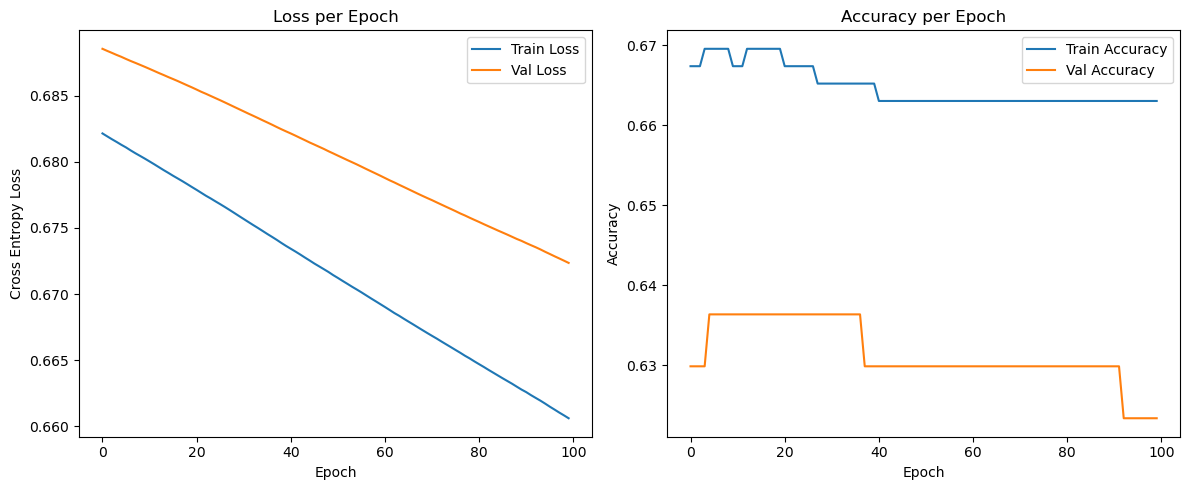

In [51]:
#sgd 적용

model, history = build_train_report_nn(
    X_train=X_train_f,           # 피처 드롭 적용된 학습용 피처
    y_train=y_train_f,           # 피처 드롭 적용된 학습용 타겟
    X_test=X_test_f,             # 피처 드롭 적용된 테스트용 피처
    y_test=y_test_f,             # 피처 드롭 적용된 테스트용 타겟
    hidden_layers=[16, 8, 4],    # 은닉층 3개 구성
    activation='relu',           # 활성화 함수: ReLU
    optimizer='sgd',             # 옵티마이저: SGD
    learning_rate=0.0005,        # 학습률 감소
    batch_size=32,               # 배치 크기
    epochs=100                   # 에폭 수
)

## 최종 결론: Optimizer 선택

### 선택: Adam

- 전반적인 정확도, Class 1 분류 성능(Precision/F1), 일반화 측면에서 가장 우수함.
- 특히 F1-score와 Macro 평균이 높아 불균형 데이터에서도 안정적인 성능을 보임.
### 차선책: Momentum 
- 모든 성능 지표에서 Adam에 비해 소폭 열세이므로, 예비 옵션으로 두기에 적절함.


### 비추천
- **RMSprop**: 전반적으로 Adam보다 성능 낮음.
- **SGD**: 성능 및 수렴 속도 모두 열세. 기본 설정으로는 실험 가치 낮음.

> 따라서 이후 실험은 Adam 기반으로 진행.

---

## 활성화 함수 실험

- 모델 구조, 하이퍼파라미터, 옵티마이저는 고정(성능 개선 실험2까지 수행(기존그대로 Adam적용))한 상태에서  
- 은닉층에 적용되는 활성화 함수만 변형하여  
- 모델의 학습 안정성 및 성능 지표(Accuracy, Recall, F1-score 등)에 미치는 영향을 비교 분석함.

Epoch 1/100


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6428 - loss: 0.6209 - val_accuracy: 0.6429 - val_loss: 0.6173
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7102 - loss: 0.5831 - val_accuracy: 0.6753 - val_loss: 0.5908
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7314 - loss: 0.5702 - val_accuracy: 0.6818 - val_loss: 0.5719
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7174 - loss: 0.5643 - val_accuracy: 0.6948 - val_loss: 0.5577
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7528 - loss: 0.5297 - val_accuracy: 0.7078 - val_loss: 0.5471
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7263 - loss: 0.5324 - val_accuracy: 0.6948 - val_loss: 0.5388
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7892 - loss: 0.4908 - val_accuracy: 0.7078 - val_loss: 0.5320
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7915 - loss: 0.4789 - val_accuracy: 0.7143 - val_loss: 0.5

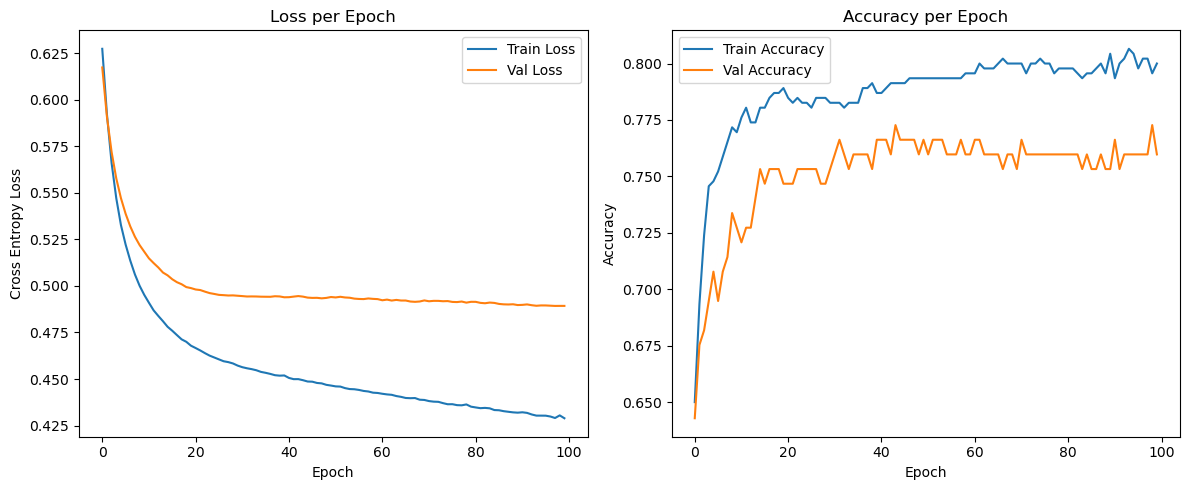

In [31]:

model, history = build_train_report_nn(
    X_train=X_train_f,
    y_train=y_train_f,
    X_test=X_test_f,
    y_test=y_test_f,
    hidden_layers=[16, 8, 4],       # 은닉층 구성
    activation='tanh',              # 활성화 함수: tanh (하이퍼볼릭 탄젠트)
    optimizer='adam',           # 옵티마이저:Adam
    learning_rate=0.0005,           # 학습률 감소
    batch_size=32,                  # 배치 사이즈
    epochs=100                      # 학습 반복 횟수
)

## 활성화 함수 비교 실험 결과: ReLU vs tanh

### 실험 목적
모델의 성능 향상 가능성을 확인하기 위해 활성화 함수 ReLU와 tanh를 각각 적용하여 신경망 분류 모델을 학습하고 성능을 비교하였다.

### 실험 조건

- **모델 구조**: 은닉층 [16, 8, 4]
- **배치 사이즈**: 32
- **Optimizer**: Adam
- **Epoch**: 100
- **Validation Split**: 0.25
- **지표**: Accuracy, Precision, Recall, F1-score (on test set)

### 분석 및 결론

- tanh는 최대 성능 수치(val_acc 기준)는 다소 높았지만, 실제 분류 성능(Recall, F1 등)에서는 낮은 값을 보여줌
- ReLU는 실제 예측력에서 **더 뛰어난 성능을 보였고**, 수렴 속도 또한 빨라 **실전 적용성이 높음**
- **따라서 최종 모델에서는 ReLU를 유지하는 것이 적절**함
---

## 최종적으로 최적화된 신경망 모델과 다른 분류 모델 간의 성능 비교

- 최적의 구조와 하이퍼파라미터로 학습된 신경망 기반 모델(NN)을 기준으로  
- SVM, Decision Tree, Random Forest, KNN 등 다른 분류 모델과의 성능 지표(Accuracy, Recall, F1-score)를 비교 분석함.

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV  # 데이터 분할 및 하이퍼파라미터 탐색용 모듈 임포트임
from sklearn.metrics import classification_report                    # 분류 성능 평가 리포트 함수 임포트임
from sklearn.neighbors import KNeighborsClassifier                   # KNN 분류기 클래스 임포트임
from sklearn.svm import SVC                                          # SVM 분류기 클래스 임포트임
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  # 랜덤포레스트, 아다부스트 분류기 임포트임
from sklearn.tree import DecisionTreeClassifier                      # 결정트리 분류기 클래스 임포트임
import pandas as pd                                                  # 데이터프레임 처리를 위한 pandas 임포트임

# 하이퍼파라미터 후보들을 딕셔너리 형태로 정의한 것임
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],              # 이웃 개수 후보 리스트임
        'weights': ['uniform', 'distance'],       # 거리 가중치 방식 후보 리스트임
        'p': [1, 2]                                # 거리 계산 방식 후보 (1=맨해튼, 2=유클리드)임
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],                    # 정규화 강도 후보 리스트임
        'kernel': ['linear', 'rbf'],               # 커널 함수 종류 후보임
        'gamma': ['scale', 'auto']                 # 감마 값 설정 후보임
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300, 400],      # 트리 개수 후보 리스트임
        'max_depth': [5, 10, 20, 30],              # 트리 최대 깊이 후보 리스트임
        'min_samples_split': [2, 5, 10],           # 내부 노드 분할 최소 샘플 수 후보임
        'min_samples_leaf': [1, 2, 4]              # 리프 노드 최소 샘플 수 후보임
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200, 300],       # 약한 학습기 개수 후보 리스트임
        'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]  # 학습률 후보 리스트임
    },
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10, None],          # 결정트리 최대 깊이 후보 리스트임
        'min_samples_split': [2, 5, 10]            # 내부 노드 분할 최소 샘플 수 후보임
    }
}

# 분류 모델 객체들을 딕셔너리로 정의한 것임
models = {
    'KNN': KNeighborsClassifier(),                          # KNN 분류기 객체임
    'SVM': SVC(),                                           # SVM 분류기 객체임
    'Random Forest': RandomForestClassifier(random_state=42),  # 랜덤포레스트 객체 (랜덤시드 고정)임
    'AdaBoost': AdaBoostClassifier(random_state=42),        # 에이다부스트 객체 (랜덤시드 고정)임
    'Decision Tree': DecisionTreeClassifier(random_state=42) # 결정트리 객체 (랜덤시드 고정)임
}

# 모델별로 학습 및 평가를 반복 수행함
for name in models:
    print(f"\n {name} 모델 학습 중...")  # 현재 학습 중인 모델 이름 출력임
    clf = GridSearchCV(models[name], param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)  # GridSearchCV로 최적 파라미터 탐색 설정임
    clf.fit(X_train_f, y_train_f)  # 학습 데이터를 사용하여 모델 학습 및 교차검증 수행함
    
    print(f" Best Params for {name}: {clf.best_params_}")  # 최적 하이퍼파라미터 출력임
    y_pred = clf.predict(X_test_f)  # 테스트셋에 대한 예측 수행임
    print(f" Classification Report for {name}:\n{classification_report(y_test_f, y_pred)}")  # 테스트셋 성능 평가 리포트 출력임


 KNN 모델 학습 중...
 Best Params for KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
 Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


 SVM 모델 학습 중...
 Best Params for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
 Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


 Random Forest 모델 학습 중...
 Best Params for Random Forest: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samp

## 분류 모델별 성능 비교 분석

### 실험 개요
- 총 5개 분류 모델에 대해 GridSearchCV로 최적 하이퍼파라미터를 탐색한 후 테스트셋에서 성능을 평가함
- 평가 지표는 Accuracy, Precision, Recall, F1-score이며 특히 **소수 클래스(1번)**에 대한 Recall 및 F1-score를 중점적으로 비교함

### 성능 요약 (클래스 1 기준)

| 모델            | Accuracy | Precision | Recall | F1-score |
|-----------------|----------|-----------|--------|----------|
| **KNN**         | 0.73     | 0.61      | 0.65   | 0.63     |
| **SVM**         | 0.76     | 0.67      | 0.65   | 0.66     |
| **RandomForest**| 0.75     | 0.65      | 0.62   | 0.64     |
| **AdaBoost**    | **0.78** | 0.74      | 0.58   | 0.65     |
| **DecisionTree**| 0.76     | 0.68      | 0.62   | 0.65     |

### 모델별 해석 및 비교

- **KNN**
  - 정확도(0.73)는 낮은 편
  - 클래스 1에 대한 Recall은 0.65로 높은 편이나 Precision이 0.61로 낮음
  - 단순한 거리 기반 모델로는 복잡한 경계 구분에 한계가 있음

- **SVM**
  - 전체적으로 **균형 잡힌 성능**을 보임
  - 클래스 1의 Recall과 F1-score가 가장 안정적
  - **복잡도 조절 가능하고 과적합 위험도 낮음**, 성능/안정성 모두 우수

- **Random Forest**
  - 전체 정확도는 0.75이나 클래스 1에 대한 Recall은 0.62로 다소 낮음
  - 앙상블 특성으로 **일반화 성능은 양호**하나, 불균형 데이터에 민감

- **AdaBoost**
  - 전체 정확도는 **가장 높음 (0.78)**
  - 클래스 1 Recall은 0.58로 **가장 낮음**
  - 주요 클래스(0번)에 집중된 학습 가능성이 있음 → 소수 클래스 민감도 낮음

- **Decision Tree**
  - 정확도는 0.76으로 상위권
  - 클래스 1의 F1-score가 0.65로 **AdaBoost와 유사**
  - 단일 트리로는 복잡한 데이터 패턴 파악에 한계

### 결론 및 추천

- **종합적으로 SVM 모델이 가장 안정적이며 클래스 1에 대한 성능(Recall/F1-score)도 우수함**
- 전체 정확도는 AdaBoost가 높지만, **소수 클래스 인식이 중요**한 경우에는 부적합함
- 따라서 향후 실험 및 모델 기반 선택 시에는 **SVM을 기준 모델로 채택**하는 것이 타당함

## 신경망 모델 vs SVM 모델 성능 비교

### 실험 목적
- 동일한 전처리 데이터셋과 평가 조건하에서 **신경망(NN) 모델**과 **SVM 분류기**의 성능을 비교함
- 비교 기준: Accuracy, Precision, Recall, F1-score

### 신경망 모델 (NN) 성능 지표

| 지표         | Class 0 | Class 1 | 전체 평균 |
|--------------|---------|---------|------------|
| Precision    | 0.82    | 0.70    | -          |
| Recall       | 0.84    | 0.67    | -          |
| F1-score     | 0.83    | 0.69    | -          |
| Accuracy     |         |         | **0.78**   |
| Macro Avg    |         |         | 0.76       |
| Weighted Avg |         |         | 0.78       |

### SVM 모델 성능 지표

| 지표         | Class 0 | Class 1 | 전체 평균 |
|--------------|---------|---------|------------|
| Precision    | 0.81    | 0.67    | -          |
| Recall       | 0.82    | 0.65    | -          |
| F1-score     | 0.81    | 0.66    | -          |
| Accuracy     |         |         | **0.76**   |
| Macro Avg    |         |         | 0.74       |
| Weighted Avg |         |         | 0.76       |

### 결론 및 분석

- 정확도(Accuracy) 기준으로는 신경망 모델(0.78)이 SVM(0.76)보다 약간 더 높은 성능을 보임
- 특히 Class 1 (소수 클래스)의 Precision, Recall, F1-score 모두 신경망이 우수함
- NN은 복잡한 패턴 학습과 비선형성에 강점을 보여 Class 1 분류 성능 개선에 기여한 것으로 해석됨
- 따라서 이 데이터셋에서는 신경망 모델이 더 나은 분류 성능을 보여줌